In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image


train_dir = '/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/dataset/train'
validation_dir = '/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/dataset/valid'

IMG_SIZE = (160, 160)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size,
  label_mode="categorical")

val_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size,
  label_mode="categorical")


class_names = train_ds.class_names
print(class_names)

Found 3304 files belonging to 12 classes.
Found 822 files belonging to 12 classes.
['CYCLE ROUTE AHEAD WARNING', 'End of all speed and passing limits', 'Give Way', 'Go Straight or Turn Right', 'Go straight or turn left', 'No Entry', 'Round-About', 'Stop_Sign', 'Straight Ahead Only', 'Truck traffic is prohibited', 'Turn left ahead', 'Turn right ahead']


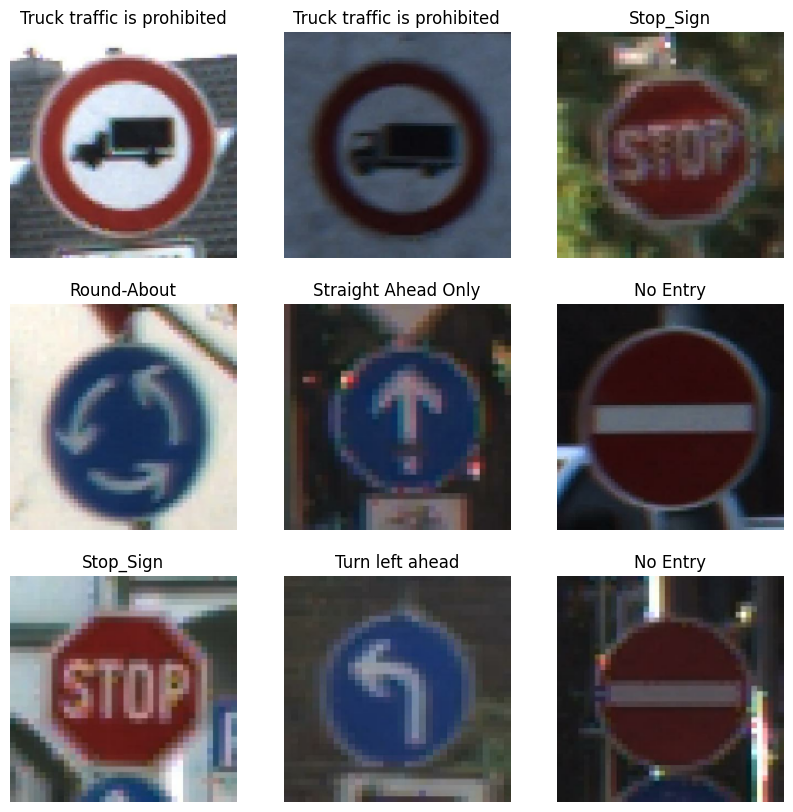

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
valid_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.Rescaling(1./255),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import BatchNormalization

num_classes = len(class_names)

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(axis=-1),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(axis=-1),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(axis=-1),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(axis=-1),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.build((None, 160, 160, 3))

model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 batch_normalization_24 (Ba  (None, 160, 160, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 80, 80, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 batch_normalization_25 (Ba  (None, 80, 80, 32)       

In [ ]:
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=10
)

Epoch 1/10
104/104 [==============================] - 263s 2s/step - loss: 1.4374 - accuracy: 0.5412 - val_loss: 3.0150 - val_accuracy: 0.0584
Epoch 2/10
104/104 [==============================] - 218s 2s/step - loss: 0.5840 - accuracy: 0.8024 - val_loss: 3.7643 - val_accuracy: 0.1217
Epoch 3/10
104/104 [==============================] - 195s 2s/step - loss: 0.3446 - accuracy: 0.8865 - val_loss: 2.6701 - val_accuracy: 0.2336
Epoch 4/10
104/104 [==============================] - 205s 2s/step - loss: 0.2226 - accuracy: 0.9328 - val_loss: 0.6746 - val_accuracy: 0.7871
Epoch 5/10
104/104 [==============================] - 199s 2s/step - loss: 0.2020 - accuracy: 0.9392 - val_loss: 0.2394 - val_accuracy: 0.9100
Epoch 6/10
104/104 [==============================] - 196s 2s/step - loss: 0.1705 - accuracy: 0.9476 - val_loss: 0.2826 - val_accuracy: 0.9002
Epoch 7/10
104/104 [==============================] - 205s 2s/step - loss: 0.1425 - accuracy: 0.9549 - val_loss: 0.1066 - val_accuracy: 0.9708

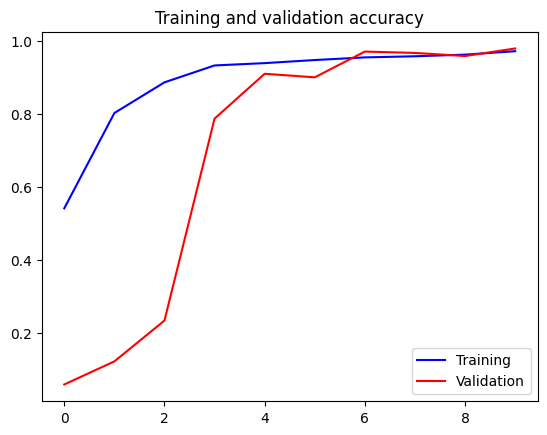

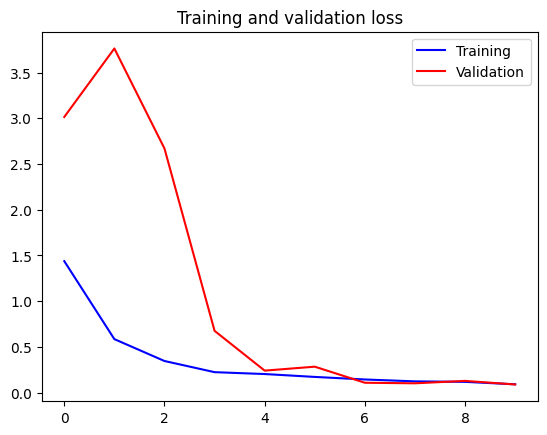

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='blue', label='Training')
plt.plot(epochs, val_acc, color='red', label='Validation')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color='blue', label='Training ')
plt.plot(epochs, val_loss, color='red', label='Validation')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/traffic_signs_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

!tensorflowjs_converter \
    --input_format=keras \
    traffic_signs_model.h5 \
    my_tfjs_model

2024-03-05 22:46:18.035075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 22:46:18.035149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 22:46:18.036639: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 22:46:19.337646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
